In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from random import randint, shuffle
from lightgbm import LGBMClassifier

In [2]:
def add_variable(x, y, p1, p2, p3, p4):
    s = []
    for i, v in enumerate(y):
        if randint(0, 100) < p1:
            c = v and 'p' or 'q'
        elif randint(0, 100) < p2:
            c = v and 'q' or 'p'
        elif randint(0, 100) < p3:
            c = 'r'
        elif randint(0, 100) < p4:
            c = 's'
        else:
            c = 't'
        s.append(c)
    col = "v_%d_%d_%d_%d" % (p1, p2, p3, p4)
    x[col] = s
x = pd.DataFrame()
y = [ i % 10 == 0 and 1 or 0 for i in range(10000) ]
for i in range(20):
    add_variable(x, y, randint(10, 20), randint(10, 20), randint(10, 90), randint(10, 90))
x_base = pd.get_dummies(x)
y_base = np.array(list(y))
w_base = np.array([ t and 1 or 0.1 for t in y ])

In [3]:
df = pd.DataFrame()

In [4]:
for lr in [ 0.2, 0.1, 0.075, 0.05, 0.025, 0.1, 0.0075, 0.005, 0.0025, 0.001 ]:
    print(lr)
    cvr = lgb.cv({'max_depth':8, 'learning_rate':lr},
                 lgb.Dataset(x_base, y_base),
                 num_boost_round=500,
                 nfold=5,
                 metrics=['auc'],
                 stratified=True)
    df[str(lr)] = cvr['auc-mean']

0.2
0.1
0.075
0.05
0.025
0.1
0.0075
0.005
0.0025
0.001


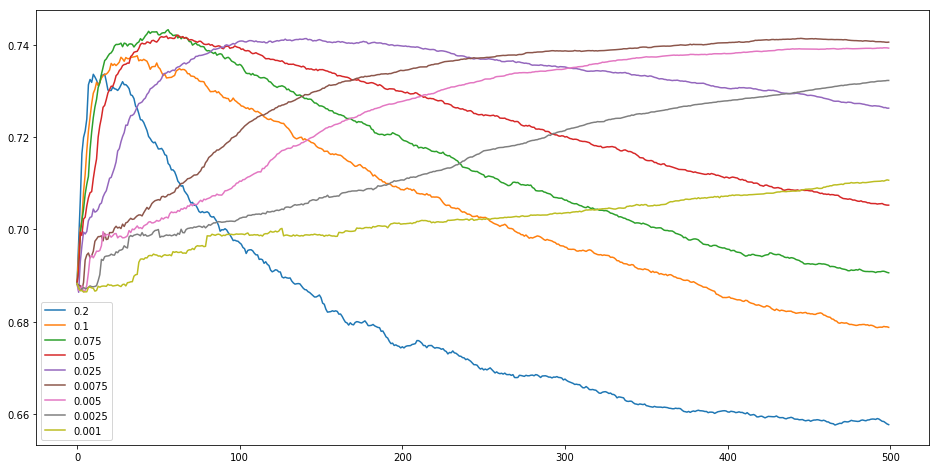

In [5]:
plt.figure(figsize=(16, 8))
plt.plot(df)
plt.legend(df.columns)

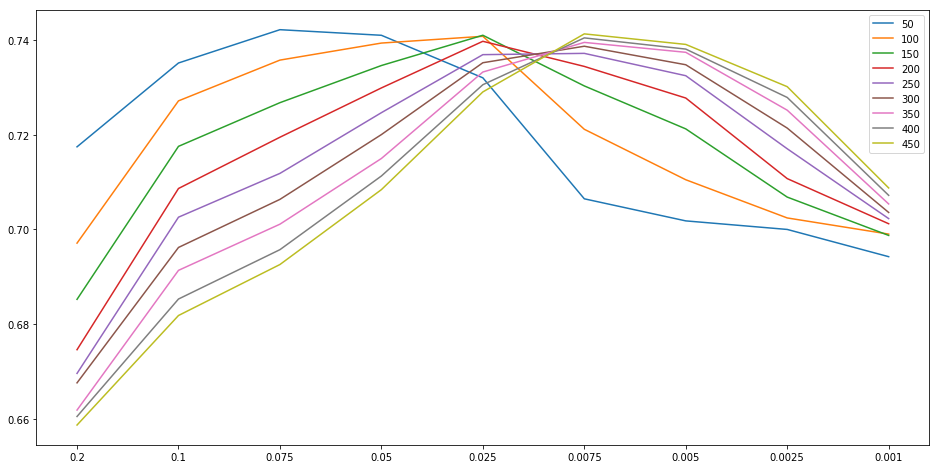

In [6]:
plt.figure(figsize=(16, 8))
tdf = df.loc[[ i for i in df.index if i > 0 and i % 50 == 0 ], :].T
plt.plot(tdf)
plt.legend(tdf.columns)